In [3]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### Tensor Manipulation and slicing

Pytorch Tensors behave in similar fashion as numpy arrays. Lets see how we can perform some basic operations of selection and filtering on them. First lets start with a 2D tensor (matrix) and see how we can select and filter this. Lets create a Double tensor with random initialization

In [17]:
a = torch.randn(7, 7, dtype=torch.double)

In [18]:
a

tensor([[ 0.0669, -0.2744, -0.2051,  0.2764,  0.2687,  0.0984, -0.7497],
        [ 0.2483, -0.7726,  0.3637, -0.6304, -0.7125, -0.1292,  0.4399],
        [ 0.3615, -2.2000, -1.3339,  1.7663, -0.4815,  0.4029, -0.6994],
        [ 1.5102, -1.4875,  1.1478,  0.3839,  0.2554,  0.1263,  1.1794],
        [-0.0152, -0.6145,  0.0674, -1.7087, -0.4047, -0.7731,  1.7592],
        [ 1.8214,  1.7345, -1.4847, -0.8724, -1.7652, -2.4989,  1.3298],
        [ 0.8138, -1.2219, -4.0511,  0.3764,  0.0747,  0.6508, -0.6348]], dtype=torch.float64)

In [19]:
a[:, :] = 0   # Assign zeros everywhere in the matrix.
a[3, 3] = 1   # Assign one in position 3, 3

In [20]:
a

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=torch.float64)

In [21]:
def showTensor(tmp):
    plt.figure()
    plt.imshow(tmp.numpy(),cmap = 'gray')
    plt.colorbar()
    plt.show()

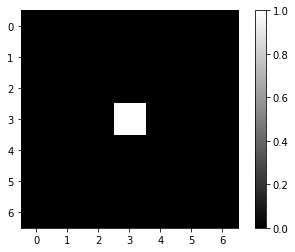

In [22]:
showTensor(a)

Here 1 corresponds to white color and 0 is black color. 
Since we have assigned only element (3rd Row , 3rd column) as 1, and other as 0 we have only white for middle of matrix.

Similar to assigning 1 element we can slice and assign values to a subset of matrix also

In [23]:
a[:, :] = 0   # Assign zeros everywhere in the matrix.
a[:2, :] = 1   # Assign ones on the top 2 rows.
a[-2:, :] = 1    # Assign ones on the bottom 2 rows.

In [25]:
a

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.]], dtype=torch.float64)

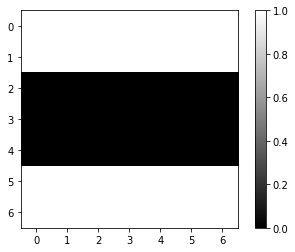

In [24]:
showTensor(a)

Now lets see how we can manipulate higher order (3D and more) tensors. Lets start with 

In [5]:
# Get the CIFAR10 train images , download if necessary
cifar_dt = torchvision.datasets.CIFAR10 ('data/', train = True , download = True )

Files already downloaded and verified


In [6]:
cifar_dt.train_data.shape

(50000, 32, 32, 3)

This code has 50000 images of shape 32*32 size. The images present are in RGB format. The images are present as a numpy array. Lets take one image and perform selection and filtering on it

In [7]:
b = torch.from_numpy(cifar_dt.train_data[4])

In [8]:
b

tensor([[[ 170,  180,  198],
         [ 168,  178,  196],
         [ 177,  185,  203],
         ...,
         [ 162,  179,  215],
         [ 158,  178,  214],
         [ 157,  177,  212]],

        [[ 168,  181,  198],
         [ 172,  185,  201],
         [ 171,  183,  200],
         ...,
         [ 159,  177,  212],
         [ 156,  176,  211],
         [ 154,  174,  209]],

        [[ 154,  170,  186],
         [ 149,  165,  181],
         [ 129,  144,  162],
         ...,
         [ 161,  178,  214],
         [ 157,  177,  212],
         [ 154,  174,  209]],

        ...,

        [[  74,   84,   80],
         [  76,   85,   81],
         [  78,   85,   82],
         ...,
         [  71,   75,   78],
         [  68,   72,   75],
         [  61,   65,   68]],

        [[  68,   76,   77],
         [  69,   77,   78],
         [  72,   79,   78],
         ...,
         [  76,   80,   83],
         [  71,   75,   78],
         [  71,   75,   78]],

        [[  67,   75,   78],
       

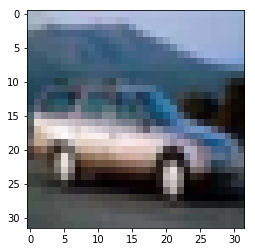

In [9]:
plt.imshow(b)

This is a 3D tensor/image whose size is 32 x 32 x 3.
In this tensor there are 3 values corresponding to Red,Green,Blue channel for 32 x 32 grid corresponding to width and hieght of the image.

Now lets perform some selection and filtering operations

In [57]:
c = b.clone()

In [54]:
c[:10,:,:] = 0 # Assign 0 or black to the first 10 rows and all columns and all channels of the image

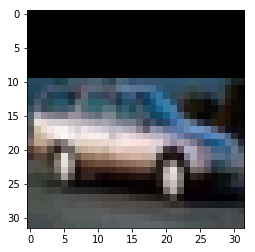

In [56]:
plt.imshow(c)

In [58]:
c[:,:10,:]  =  0

In [60]:
c

tensor([[[   0,    0,    0],
         [   0,    0,    0],
         [   0,    0,    0],
         ...,
         [ 162,  179,  215],
         [ 158,  178,  214],
         [ 157,  177,  212]],

        [[   0,    0,    0],
         [   0,    0,    0],
         [   0,    0,    0],
         ...,
         [ 159,  177,  212],
         [ 156,  176,  211],
         [ 154,  174,  209]],

        [[   0,    0,    0],
         [   0,    0,    0],
         [   0,    0,    0],
         ...,
         [ 161,  178,  214],
         [ 157,  177,  212],
         [ 154,  174,  209]],

        ...,

        [[   0,    0,    0],
         [   0,    0,    0],
         [   0,    0,    0],
         ...,
         [  71,   75,   78],
         [  68,   72,   75],
         [  61,   65,   68]],

        [[   0,    0,    0],
         [   0,    0,    0],
         [   0,    0,    0],
         ...,
         [  76,   80,   83],
         [  71,   75,   78],
         [  71,   75,   78]],

        [[   0,    0,    0],
       

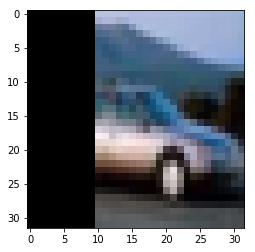

In [59]:
plt.imshow(c)

Lets perform a transpose operation and see the transposed image

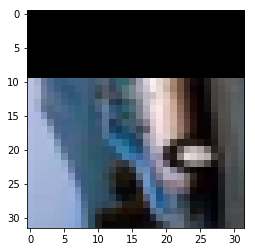

In [63]:
plt.imshow(c.t())

Now if i want to extract only the upper right hand corner 5 grid pixel from the image which is sky of the image. We can do it as below

In [75]:
d = c[0:5,25:,:]
d

tensor([[[ 168,  184,  220],
         [ 166,  182,  218],
         [ 163,  179,  215],
         [ 163,  179,  215],
         [ 162,  179,  215],
         [ 158,  178,  214],
         [ 157,  177,  212]],

        [[ 164,  180,  216],
         [ 163,  179,  215],
         [ 160,  176,  212],
         [ 161,  177,  213],
         [ 159,  177,  212],
         [ 156,  176,  211],
         [ 154,  174,  209]],

        [[ 163,  179,  215],
         [ 163,  179,  215],
         [ 160,  176,  212],
         [ 162,  178,  214],
         [ 161,  178,  214],
         [ 157,  177,  212],
         [ 154,  174,  209]],

        [[ 163,  179,  215],
         [ 163,  179,  215],
         [ 160,  176,  212],
         [ 161,  176,  212],
         [ 160,  177,  213],
         [ 156,  176,  211],
         [ 152,  172,  207]],

        [[ 163,  179,  214],
         [ 160,  178,  214],
         [ 158,  176,  213],
         [ 157,  175,  212],
         [ 156,  175,  211],
         [ 154,  174,  210],
      

In [77]:
d.shape

torch.Size([5, 7, 3])

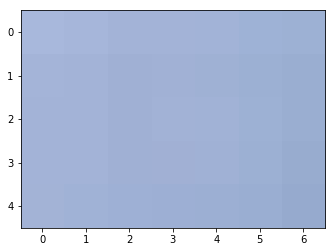

In [76]:
plt.imshow(d)

Now lets perform the same operations on 4D tensor. In our case the 4D tensor corresponds to multiple images in a single tensor

In [10]:
b = cifar_dt.train_data[:2]
b = torch.from_numpy(b)

In [11]:
b.shape

torch.Size([2, 32, 32, 3])

In [12]:
def showimgSideBySide(b):
    fig,ax = plt.subplots(nrows  = 1,ncols=2)
    ax[0].imshow(b[0])
    ax[1].imshow(b[1])

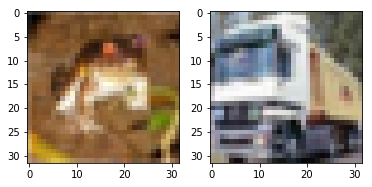

In [13]:
showimgSideBySide(b)

Now lets transpose the entrire 4D tensor. We will use the built in Pytorch transpose function to do that. We want to transpose the height and width of the image so we will provide 1 and 2 as dimension axes

In [22]:
tt =b.transpose(1, 2)

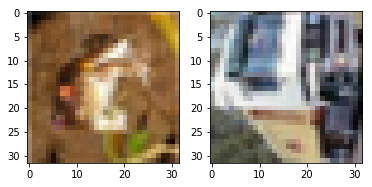

In [23]:
showimgSideBySide(tt)